In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv('../data/raw/c.csv', encoding='latin1')
df.head()

/var/folders/_6/0nvv1lhn0gz1q__7mdvsvws00000gn/T/ipykernel_50760/3140671648.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/c.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.info()
df.shape
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
cols = ['iyear','imonth','iday','country_txt','region_txt','city',
        'attacktype1_txt','targtype1_txt','weaptype1_txt',
        'gname','nkill','nwound','summary']
df = df[cols]
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,weaptype1_txt,gname,nkill,nwound,summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN,NaN


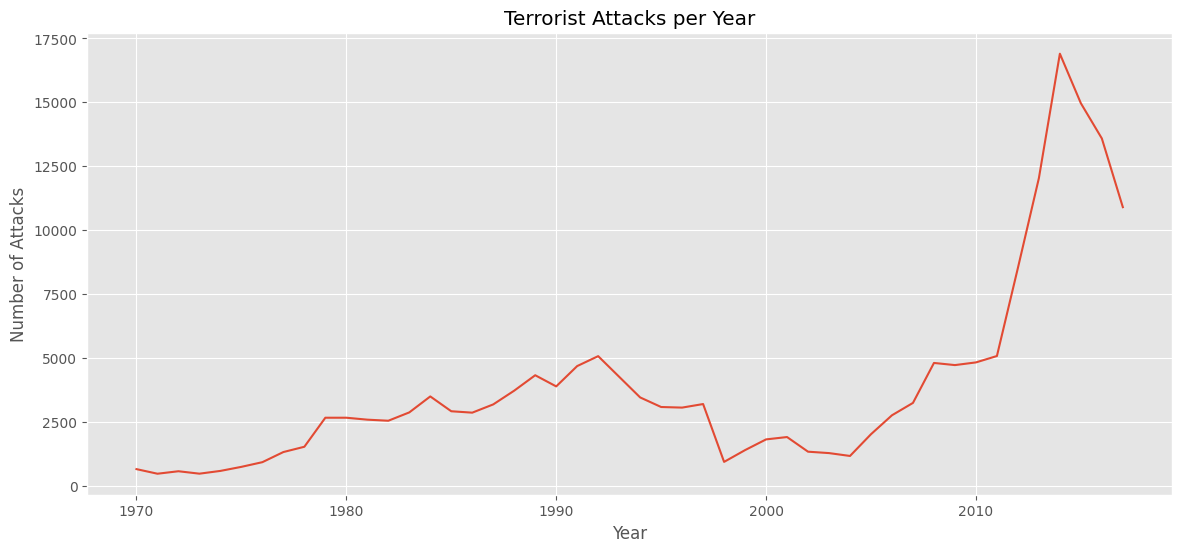

In [6]:
plt.figure(figsize=(14,6))
df.groupby('iyear').size().plot()
plt.title("Terrorist Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

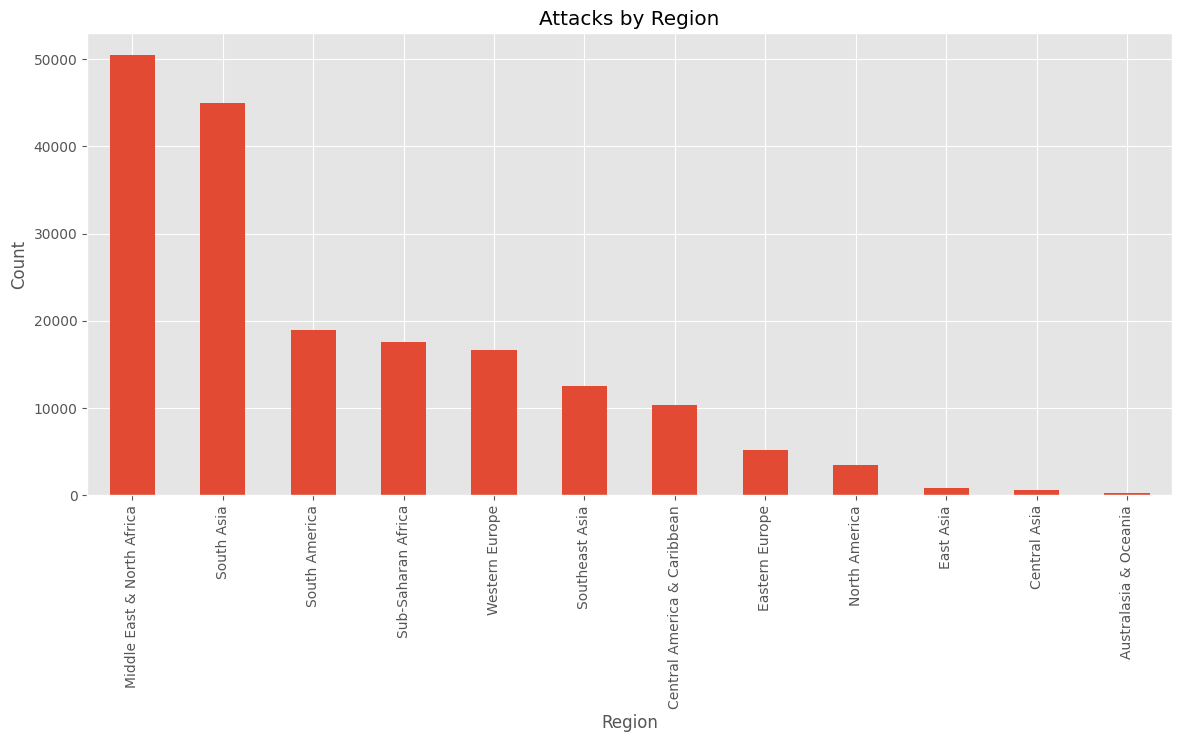

In [7]:
plt.figure(figsize=(14,6))
df['region_txt'].value_counts().plot(kind='bar')
plt.title("Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [8]:
top_groups = df[df['gname'] != 'Unknown']['gname'].value_counts().head(10)

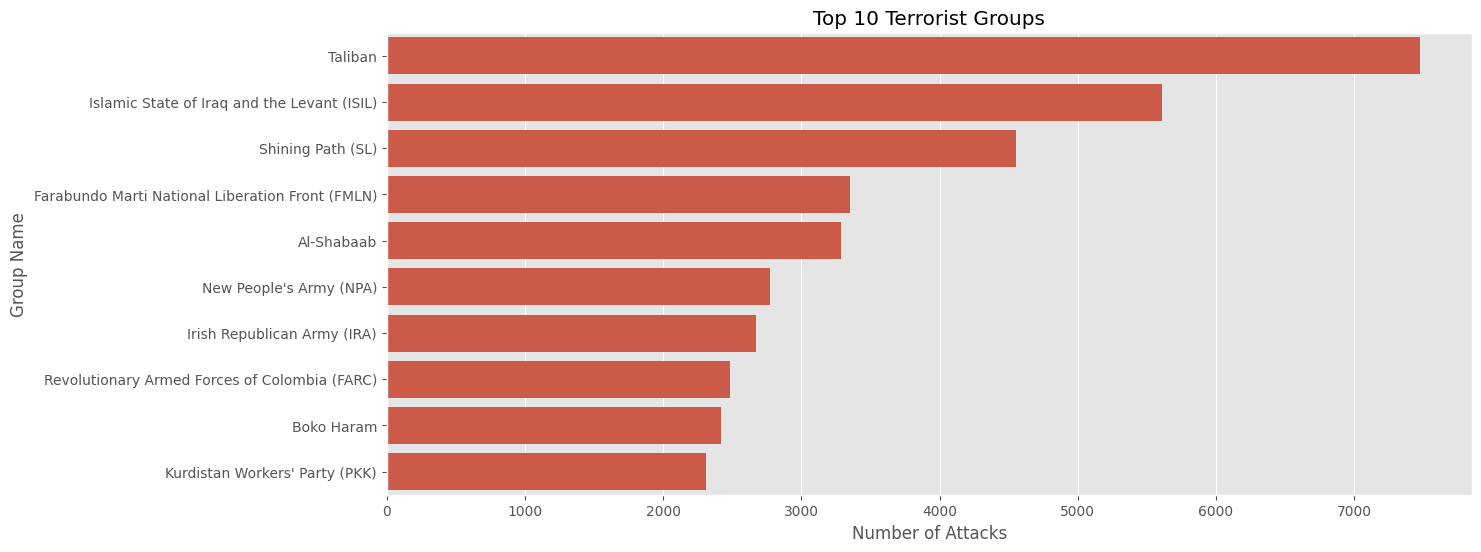

In [9]:
plt.figure(figsize=(14,6))
sns.barplot(x=top_groups.values, y=top_groups.index)
plt.title("Top 10 Terrorist Groups")
plt.xlabel("Number of Attacks")
plt.ylabel("Group Name")
plt.show()

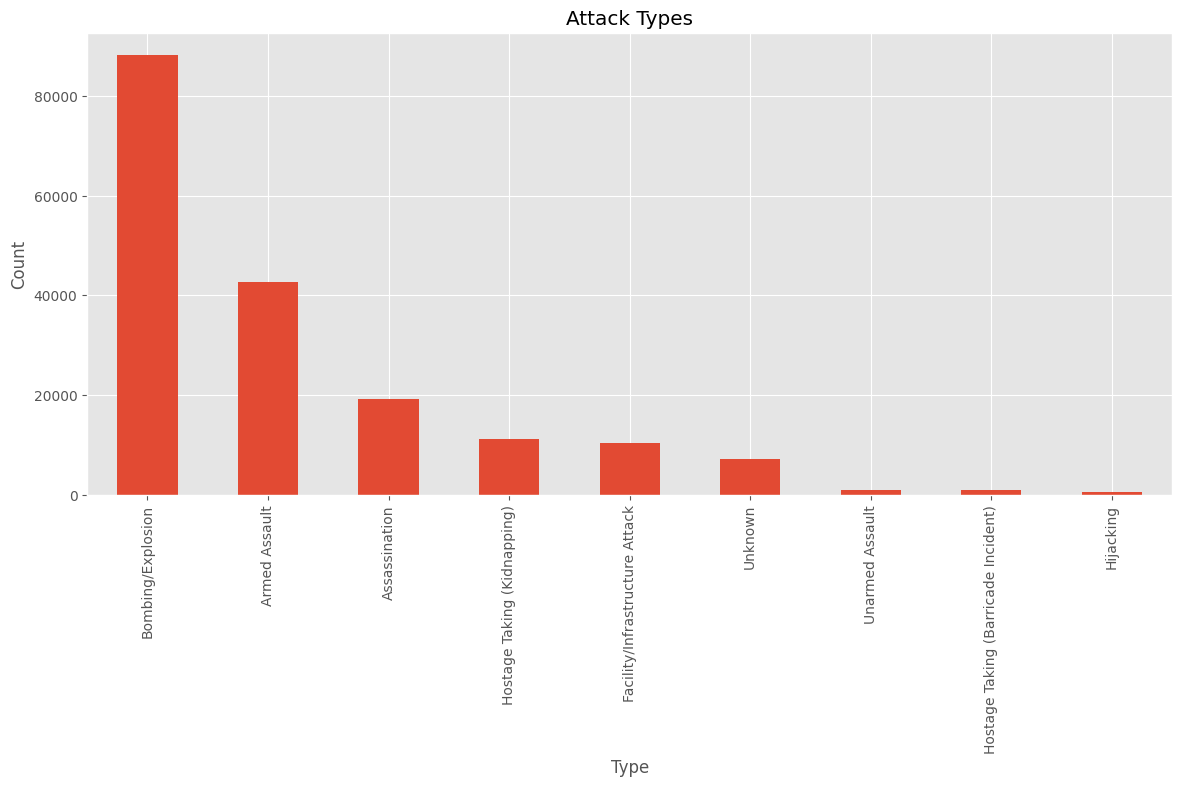

In [10]:
plt.figure(figsize=(14,6))
df['attacktype1_txt'].value_counts().plot(kind='bar')
plt.title("Attack Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [11]:
fatalities = df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)

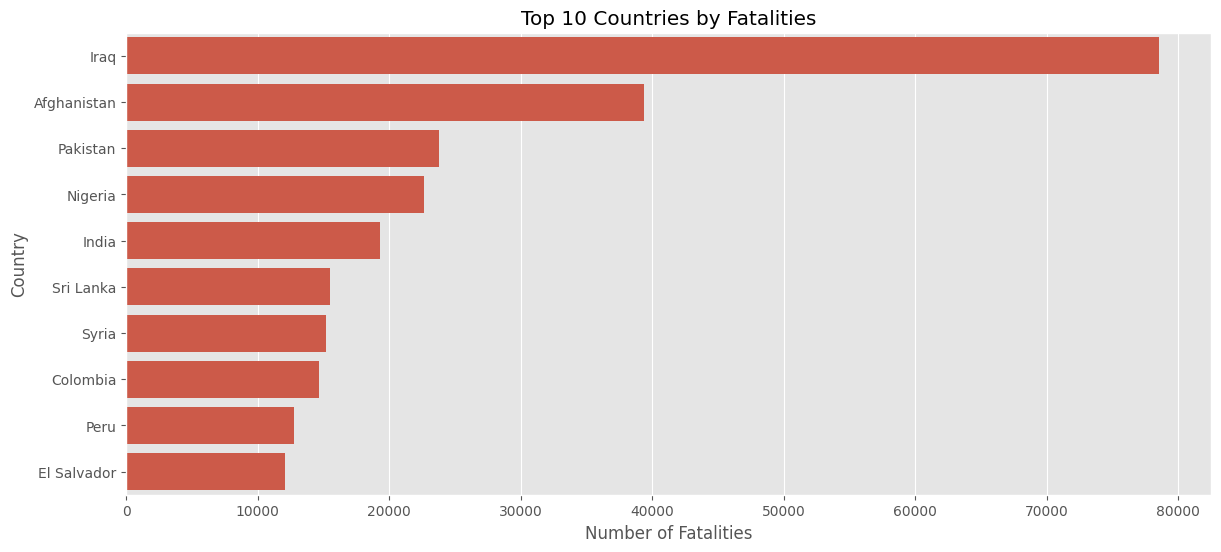

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(x=fatalities.values, y=fatalities.index)
plt.title("Top 10 Countries by Fatalities")
plt.xlabel("Number of Fatalities")
plt.ylabel("Country")
plt.show()